# Welcome
    I have made a facial expression recognition system using Neural networks in TensorFlow
**Dataset** - https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset


## Summury
The dataset consists of 6 distinct emotions : Happy, Angry, Sad, Neutral, Surprise and Ahegao. Images are RGB and presented as cropped faces with corresponding emotions. The images were collected by scrapping social nets as Facebook and Instagram, scrapping YouTube videos and already available datasets as IMDB and AffectNet.
1) dataset.zip contains folders with corresponding classes.
2) data.csv contains pathes to images and corresponding labels.

# TESTING
    i will be using my own images caputerd using cv2 from OpenCV cropping it and feeding it into the model to make predictions

In [5]:
pwd

'C:\\Users\\Divyansh Kumar\\Desktop\\Collage stuff\\Jupyter_python'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

In [7]:
base_dir = r"C:\Users\Divyansh Kumar\Desktop\Collage stuff\Jupyter_python\FaceExpressionRecognition\dataset"
data = pd.read_csv(r"C:\Users\Divyansh Kumar\Desktop\Collage stuff\Jupyter_python\FaceExpressionRecognition\data.csv")
data.head()

Unnamed: 0                                               path     label
0           0  Surprise/1bd930d6a1c717c11be33db74823f661cb53f...  Surprise
1           1       Surprise/cropped_emotions.100096~12fffff.png  Surprise
2           2  Surprise/0df0e470e33093f5b72a8197fa209d684032c...  Surprise
3           3       Surprise/cropped_emotions.260779~12fffff.png  Surprise
4           4       Surprise/cropped_emotions.263616~12fffff.png  Surprise

# Visualisation
    1) Plot a bar chart to see how many images there are for each emotion.
    2) Display some sample images 
**(ahegao will not be displayed)**


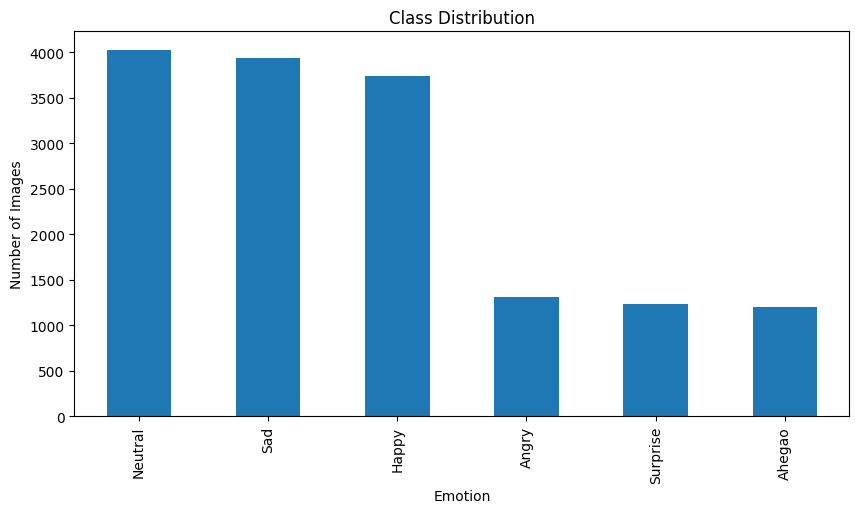

In [8]:
class_counts = data['label'].value_counts()
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.show()

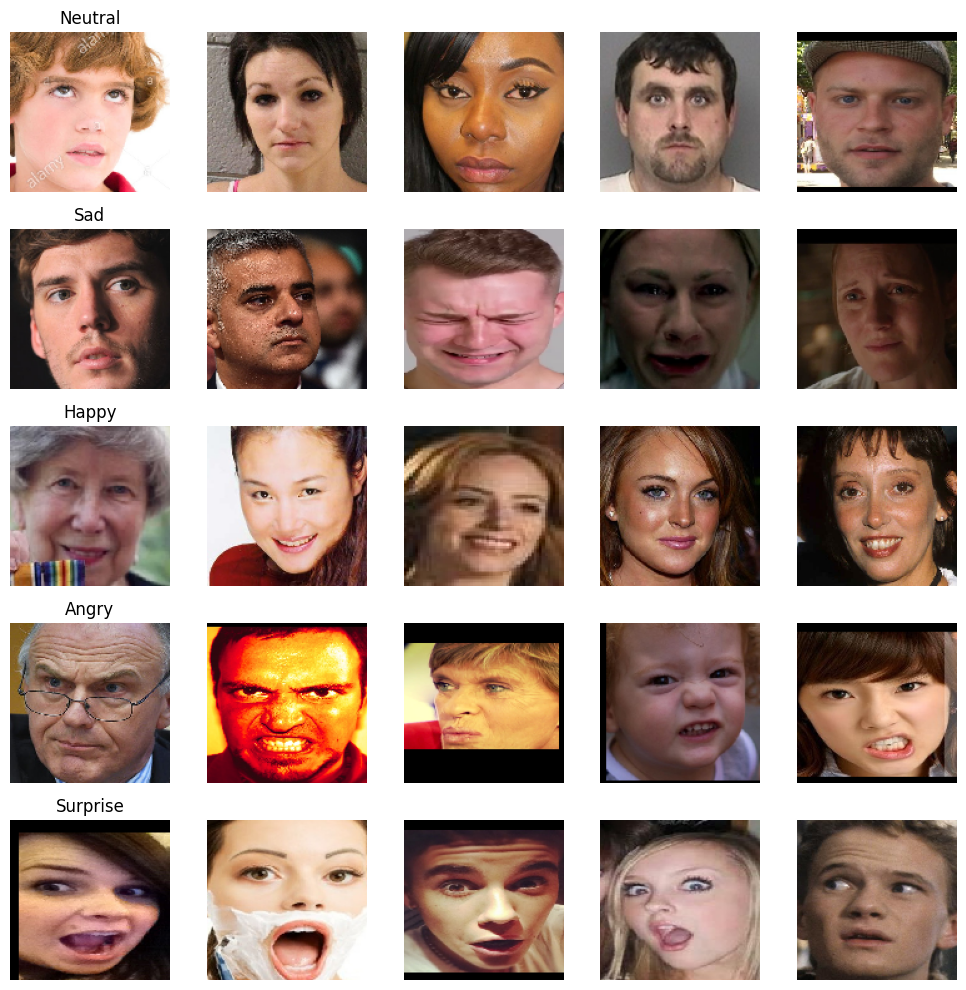

In [9]:

# Display some sample images from each class
def display_samples(data, base_dir, num_samples=5):
    # Exclude "Ahegao" and check if any other class is empty
    emotions_to_show = [emotion for emotion in class_counts.index if emotion != 'Ahegao' and class_counts[emotion] > 0]

    # Handle case where there are fewer emotions to show than expected
    num_rows = len(emotions_to_show)
    if num_rows == 0:
        print("No valid classes with images found.")
        return

    fig, axes = plt.subplots(num_rows, num_samples, figsize=(num_samples * 2, num_rows * 2))

    for i, emotion in enumerate(emotions_to_show):
        samples = data[data['label'] == emotion].sample(num_samples)
        for j, (idx, row) in enumerate(samples.iterrows()):
            img_path = os.path.join(base_dir, row['path'])
            img = load_img(img_path, target_size=(128, 128))  # Set target size to 128x128
            ax = axes[i, j]
            ax.imshow(img)
            ax.axis('off')
            if j == 0:
                ax.set_title(emotion)
    plt.tight_layout()
    plt.show()

# Example usage
display_samples(data, base_dir)

Below Code will take a minute or even few Minutes to run. This is because we have taken 128 by 128 pixels for more accuracy 
- First we preprocess the image. We convert the image into array each image is considered as 128 by 128 matrix with each element representing the intensity of the pixel.
- Since the image is in RGB, each pixel is represented as a 1x3 array which represents the intensity of Red, Blue and Green
- Since the intensity values range between 0 to 255 we normalize it between 0 to 1
- X_train and y_train are the training sets used to train model
- X_val and y_val are validation sets used to check how accurate is our model by making predictions on it and comparing with actual value

In [10]:

#Loading the dataset
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(128, 128))
    img = img_to_array(img)
    img = img / 255.0
    return img
X = []
y = []

for idx, row in data.iterrows():
    img_path = os.path.join(base_dir, row['path'])
    img = preprocess_image(img_path)
    X.append(img)
    y.append(row['label'])

X = np.array(X)
y = tf.keras.utils.to_categorical(y, num_classes=6)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (12362, 128, 128, 3)
Validation data shape: (3091, 128, 128, 3)


# Model Architecture
 - We are using Sequential Model 
 ## We will be using Convolution Neural Networks 
     - These are best to use for any task related to classification of image
     - These reduces the number of Parameters by using Layers like Filters, MaxPolling and Flatten which compresses 

In [11]:
#Making a CNN Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Compiling and training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.2734 - loss: 1.9440 - val_accuracy: 0.4960 - val_loss: 1.3260
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.4461 - loss: 1.3158 - val_accuracy: 0.5490 - val_loss: 1.1553
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.5170 - loss: 1.1642 - val_accuracy: 0.5836 - val_loss: 1.0749
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.5671 - loss: 1.0381 - val_accuracy: 0.6179 - val_loss: 0.9666
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6168 - loss: 0.9166 - val_accuracy: 0.6244 - val_loss: 0.9406
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.6629 - loss: 0.8155 - val_accuracy: 0.6231 - val_loss: 0.9453
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.6939 - loss: 0.7463 - val_accuracy: 0.6457 - val_loss: 0.9523
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.7417 - loss: 0.6290 - 

# Accuracy
    


In [16]:
model.evaluate(X_val, y_val)

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6392 - loss: 1.0091


[1.0339434146881104, 0.6344225406646729]

Accuracy is quite low. But its a good fit, earlier we were encountering overfitting 

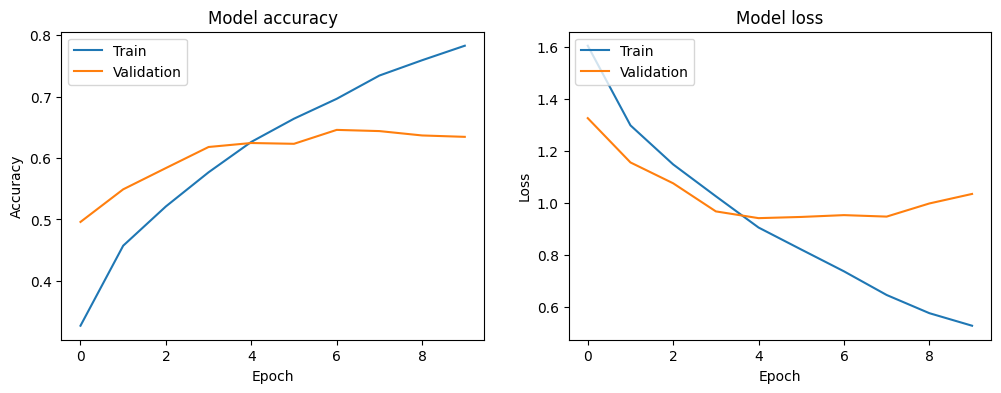

In [17]:
#Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [18]:
model.save('emotion_recognition_model.h5')

# TESTING Yourself
    You can upload any image in the directory and test the model
    i have my own image which i will be Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted emotion: Surprise


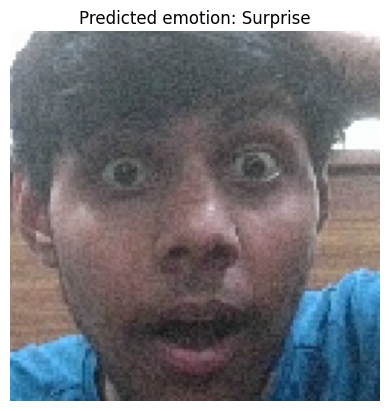

In [34]:
class_labels = ['Happy', 'Angry', 'Sad', 'Neutral', 'Surprise', 'Ahegao']



def preprocess_image(img_path):
    img = load_img(img_path, target_size=(128, 128))  # Change target_size to (128, 128)
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape (1, 128, 128, 3)
    return img

# Predict function
def predict_emotion(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class, img

# Example usage
image_path = 'cropped_face.jpg'  # Replace with the path of your uploaded image
if os.path.exists(image_path):
    emotion, preprocessed_image = predict_emotion(image_path)
    print(f"Predicted emotion: {emotion}")
    
    # Display the image
    original_image = load_img(image_path, target_size=(128, 128))  # Change target_size to (128, 128)
    plt.imshow(original_image)
    plt.title(f"Predicted emotion: {emotion}")
    plt.axis('off')
    plt.show()
else:
    print(f"Image file {image_path} does not exist.")

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


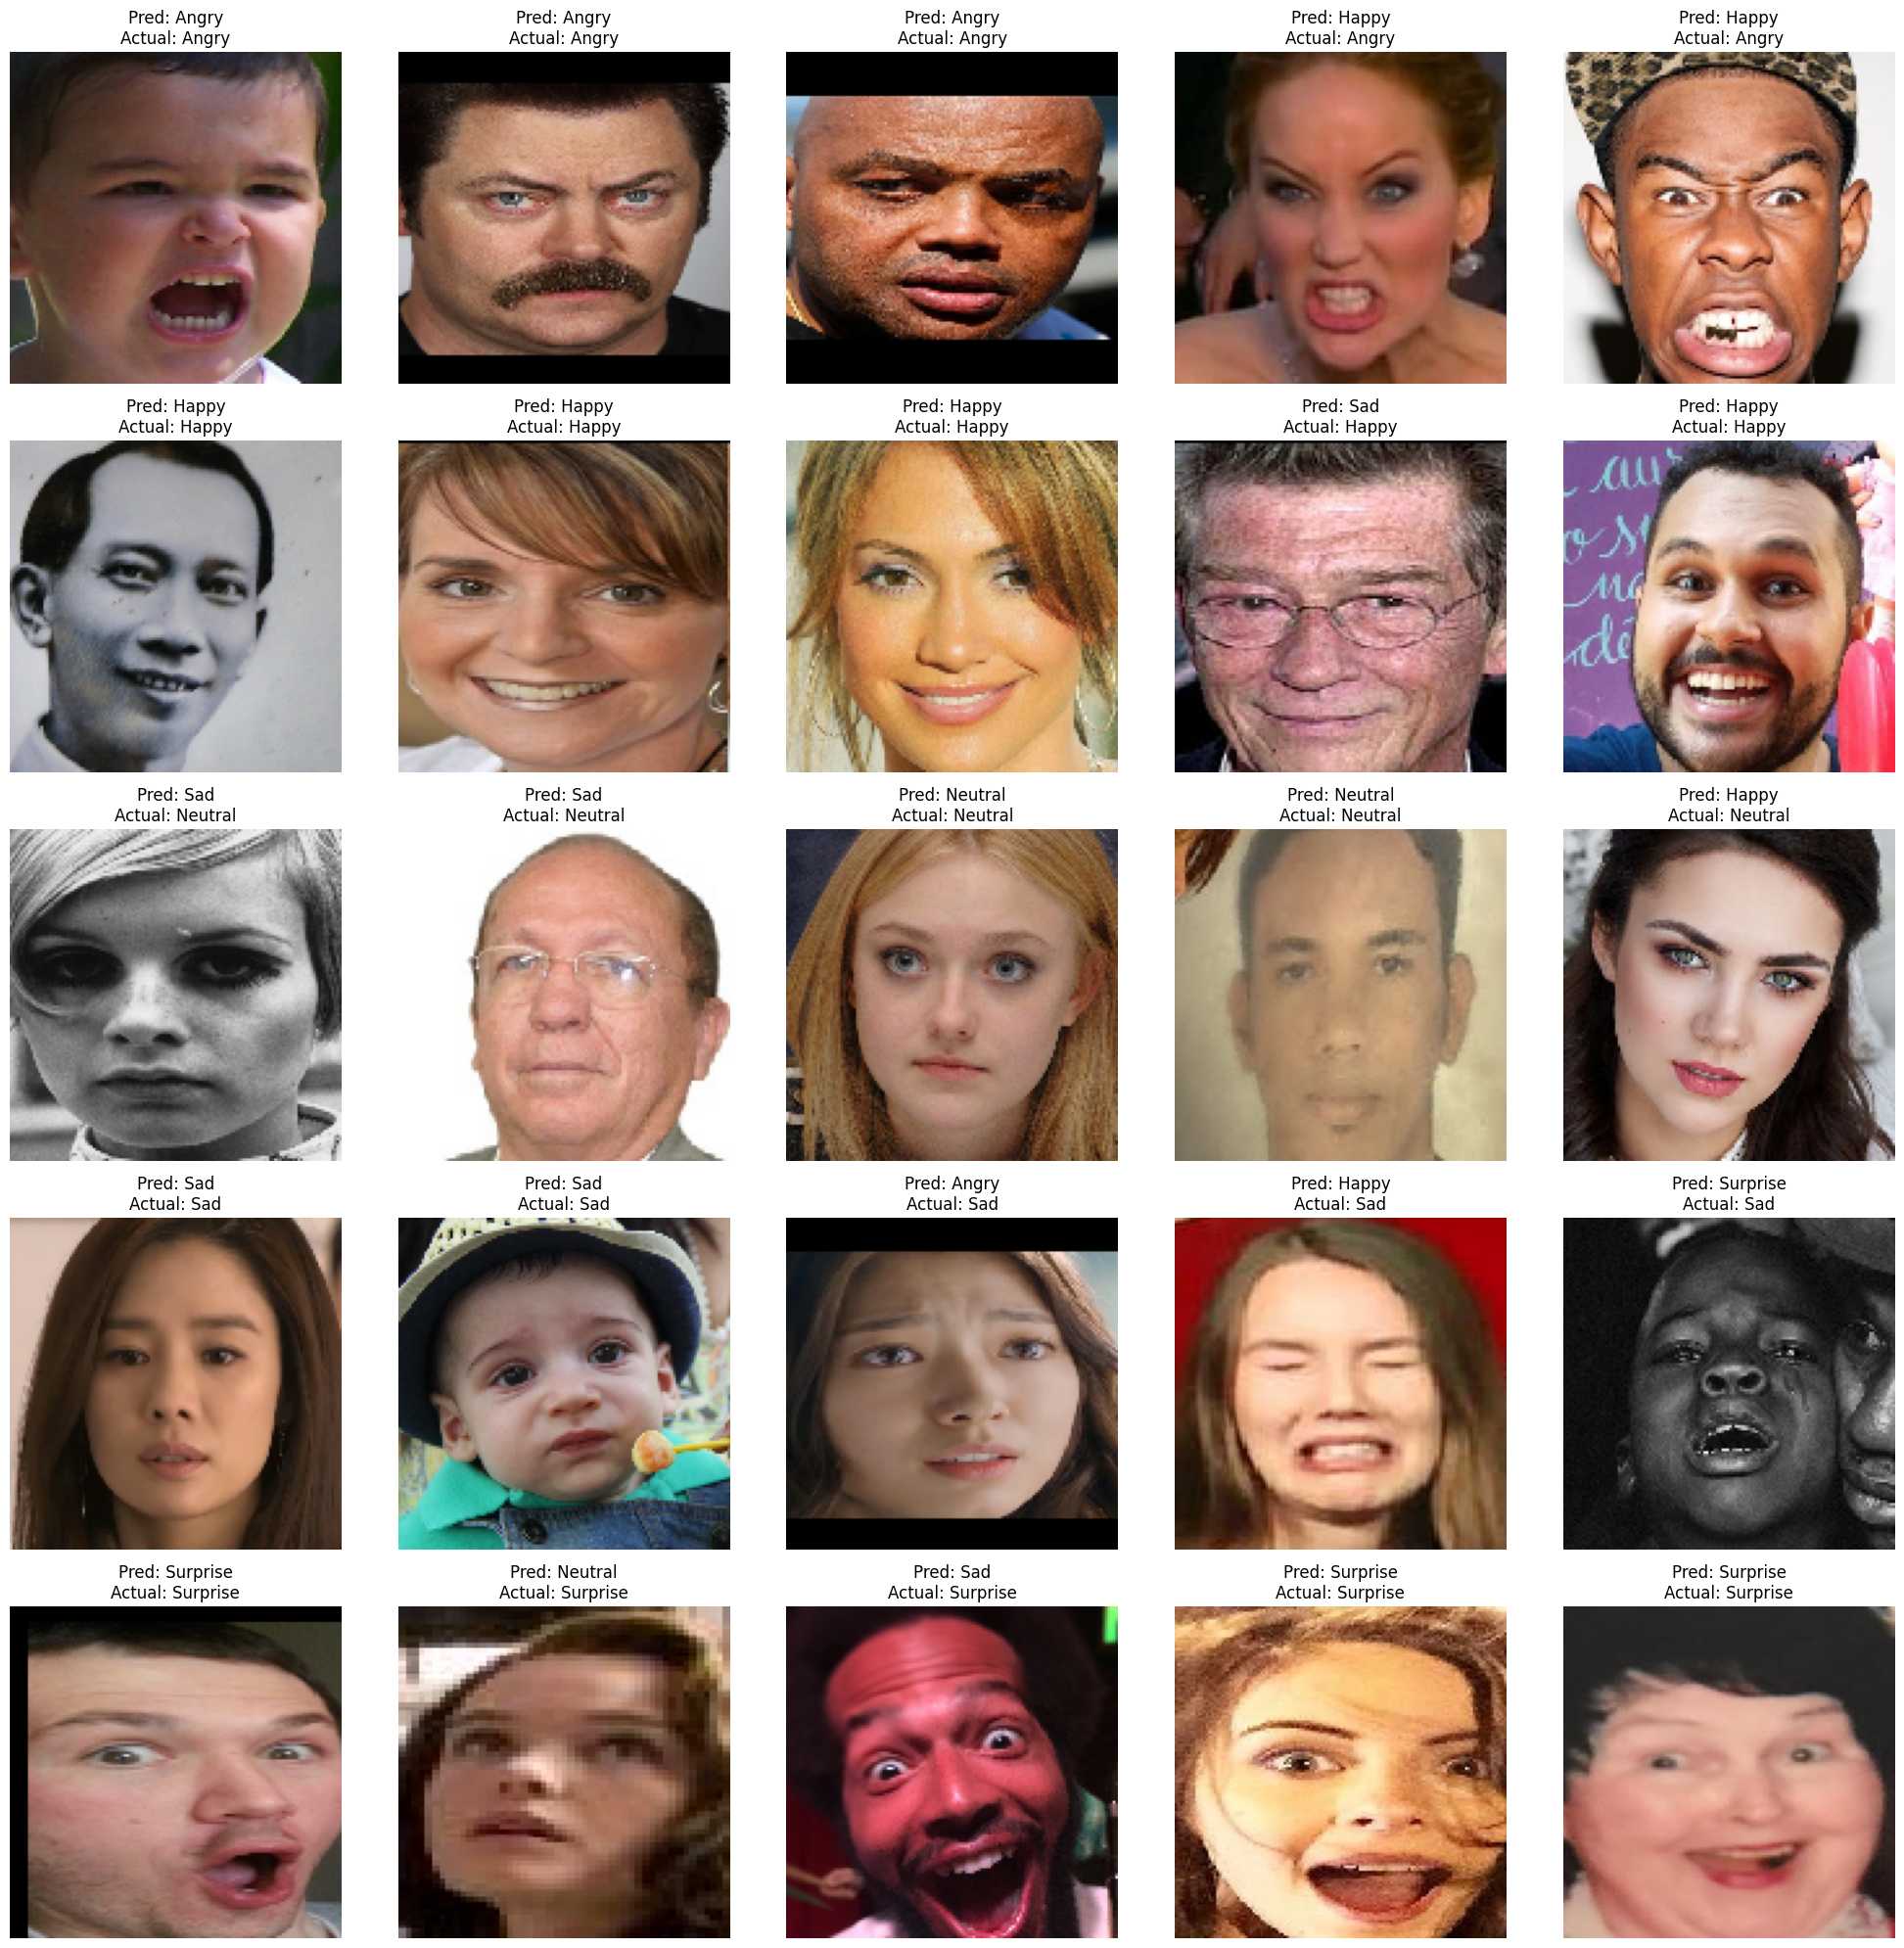

In [27]:
import matplotlib.pyplot as plt

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Decode the predictions and actual labels
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = np.argmax(y_val, axis=1)

# Decode the labels to emotion names
emotion_labels = label_encoder.inverse_transform(np.arange(6))

# Find the index of the "ahegao" emotion
ahegao_index = np.where(emotion_labels == 'Ahegao')[0][0]

# Create a dictionary to store 5 images for each category
images_by_category = {i: [] for i in range(6)}

# Populate the dictionary with images and their predictions
for i in range(len(X_val)):
    if actual_labels[i] != ahegao_index and len(images_by_category[actual_labels[i]]) < 5:
        images_by_category[actual_labels[i]].append((X_val[i], predicted_labels[i], actual_labels[i]))

# Plot the images excluding the "ahegao" category
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(6):
    if i == ahegao_index:
        continue
    row = i if i < ahegao_index else i - 1
    for j in range(5):
        if j < len(images_by_category[i]):
            img, pred, actual = images_by_category[i][j]
            axes[row, j].imshow(img)
            axes[row, j].set_title(f"Pred: {emotion_labels[pred]}\nActual: {emotion_labels[actual]}")
            axes[row, j].axis('off')
        else:
            axes[row, j].axis('off')
plt.tight_layout()
plt.show()


# As you can observe we have 2-3 predictions actually correct in every 5 images.
This Model is Not very accurate but gets the job done.